In [1]:
import pandas as pd
from zipfile import ZipFile
import numpy as np
import matplotlib.pyplot as plt

def load_PAXG():
    # From Kraken
    with ZipFile("PAXG.zip",'r') as zip:
        with zip.open("PAXGUSD.csv") as f:
            df = pd.read_csv(f, names=["Time","Price","Volume"])

    df["Time"] = pd.to_datetime(df["Time"], unit='s')
    df["Price"] = df["Price"]
    return df["Time"], df["Price"]

def load_XAU_stooq():
    # https://stooq.com/q/d/?s=xauusd&c=0&d1=20180101&d2=20210811
    with open("xauusd_d.csv") as f:
        df = pd.read_csv(f)
    df["Date"] = pd.to_datetime(df["Date"])
    return df["Date"], df["Open"]

def load_XAU_goldprice():
    # https://goldprice.org/spot-gold.html
    with open("gold_2_year_o_usd_x.csv") as f:
        df = pd.read_csv(f, names=["Time","Price"])
    df["Time"] = pd.to_datetime(df["Time"])
    return df["Time"], df["Price"]


t_PAXG, p_PAXG = load_PAXG()
# t_XAU, p_XAU = load_XAU_goldprice()
t_XAU, p_XAU = load_XAU_stooq()

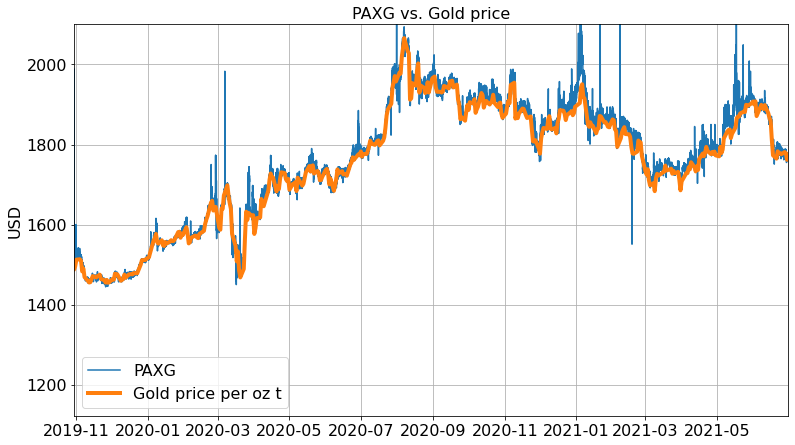

In [2]:
plt.figure(figsize=[6.4*2, 4.8*1.5])
plt.plot(t_PAXG, p_PAXG, label = "PAXG")
plt.plot(t_XAU, p_XAU, label = "Gold price per oz t", linewidth=4)
plt.grid()
plt.ylim(top = 2100)
plt.legend(fontsize=16)
plt.ylabel("USD", fontsize=16)
plt.title("PAXG vs. Gold price", fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlim(left = t_PAXG[0], right = t_PAXG[len(t_PAXG)-1])
plt.savefig(fname="figure")
plt.show()
